<a href="https://colab.research.google.com/github/HJJunn/hands-on-machine-learning/blob/main/17%EC%9E%A5_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94%EC%99%80_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version은 코랩에서만 동작합니다.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("감지된 GPU가 없습니다. GPU가 없으면 LSTM과 CNN이 매우 느릴 수 있습니다.")
    if IS_COLAB:
        print("런타임 > 런타임 유형 변경 메뉴를 선택하고 하드웨어 가속기로 GPU를 고르세요.")

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
감지된 GPU가 없습니다. GPU가 없으면 LSTM과 CNN이 매우 느릴 수 있습니다.
런타임 > 런타임 유형 변경 메뉴를 선택하고 하드웨어 가속기로 GPU를 고르세요.


In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# 1. 선형 오토인코더

In [ ]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [ ]:
from tensorflow import keras

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape = [3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape = [2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate = 1.5))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = autoencoder.fit(X_train, X_train, epochs = 20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0496
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0477
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0450
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0414
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0366
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0307
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0243
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0184
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0139
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0111
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0096
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0098
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0098
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━━

In [ ]:
codings = encoder.predict(X_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


그림 저장 linear_autoencoder_pca_plot


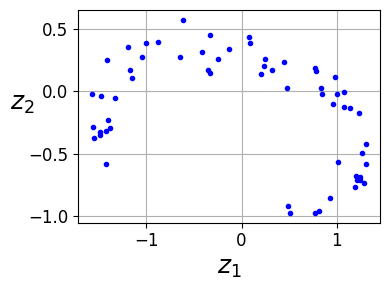

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

# 2. 적층 오토인코더

In [ ]:
#MNIST 데이터셋
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 한번의 모든 층 훈련하기


*   3개의 은닉층과 1개의 출력층을 가진 오토인코더



In [ ]:
def round_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(100, activation= "selu"),
    keras.layers.Dense(30, activation = "selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation = "selu", input_shape = [30]),
    keras.layers.Dense(28 * 28, activation = "sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.SGD(learning_rate = 1.5), metrics = [round_accuracy])

history = stacked_ae.fit(X_train, X_train, epochs = 20, validation_data = (X_valid, X_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3808 - round_accuracy: 0.8485 - val_loss: 0.3120 - val_round_accuracy: 0.9072
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.3057 - round_accuracy: 0.9149 - val_loss: 0.3010 - val_round_accuracy: 0.9207
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.2985 - round_accuracy: 0.9214 - val_loss: 0.2968 - val_round_accuracy: 0.9267
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 0.2940 - round_accuracy: 0.9254 - val_loss: 0.3014 - val_round_accuracy: 0.9244
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.2911 - round_accuracy: 0.9281 - val_loss: 0.2909 - val_round_accuracy: 0.9307
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.2889 - round_accuracy: 0.9299 - val_loss: 0.2908 - val_round_accuracy: 0.9322
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.2873 - round_accuracy: 0.9314 - val_loss: 0.2896 - val_round_accuracy: 0.9333

## 재구성 시각화

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
# show_reconstructions(stacked_ae)
# save_fig("reconstruction_plot")

## 패션 MNIST 시각화

In [ ]:
np.random.seed(42)

from sklearn.manifold import TSNE
X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


그림 저장 fashion_mnist_visualization_plot


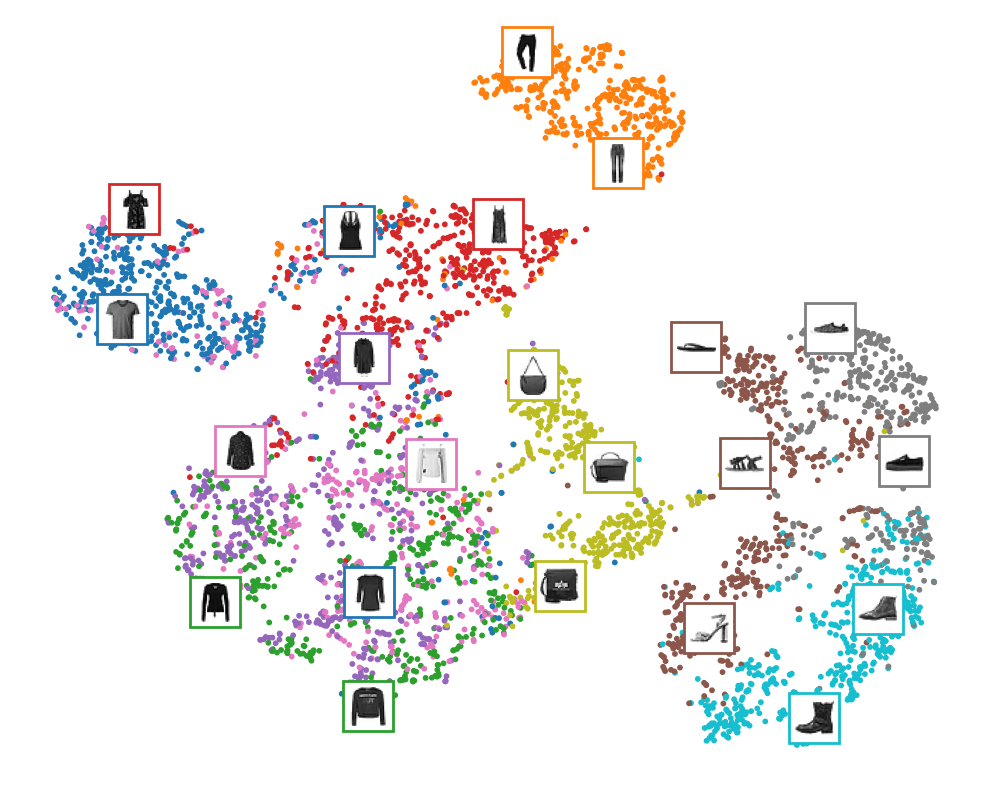

In [ ]:
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()

## 가중치 묶기

In [ ]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[round_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

AttributeError: 'Dense' object has no attribute 'input_shape'

# 3. 합성곱 오토인코더

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28,28,1], input_shape=[28,28]),
    keras.layers.Conv2D(16, kernel_size = 3, padding = "same", activation = "selu"),
    keras.layers.MaxPool2D(pool_size = 2),
    keras.layers.Conv2D(32, kernel_size = 3, padding = "same", activation = "selu"),
    keras.layers.MaxPool2D(pool_size = 2),
    keras.layers.Conv2D(64, kernel_size = 3, padding = "same", activation = "selu"),
    keras.layers.MaxPool2D(pool_size = 2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size = 3, strides = 2 ,padding = "valid", activation = "selu", input_shape = [3,3,64]),
    keras.layers.Conv2DTranspose(16, kernel_size = 3, strides = 2, padding = "same", activation = "selu"),
    keras.layers.Conv2DTranspose(1, kernel_size = 3, strides = 2, padding = "same", activation = "sigmoid"),
    keras.layers.Reshape([28,28])
    ])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
conv_ae.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.SGD(learning_rate = 1.0), metrics = [round_accuracy])
history = conv_ae.fit(X_train, X_train, epochs = 5, validation_data = (X_valid, X_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 71s 39ms/step - loss: 0.3114 - round_accuracy: 0.9091 - val_loss: 0.2804 - val_round_accuracy: 0.9395
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - loss: 0.2762 - round_accuracy: 0.9400 - val_loss: 0.2743 - val_round_accuracy: 0.9447
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 105s 51ms/step - loss: 0.2711 - round_accuracy: 0.9453 - val_loss: 0.2707 - val_round_accuracy: 0.9478
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 145s 53ms/step - loss: 0.2683 - round_accuracy: 0.9484 - val_loss: 0.2682 - val_round_accuracy: 0.9502
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 131s 47ms/step - loss: 0.2663 - round_accuracy: 0.9507 - val_loss: 0.2669 - val_round_accuracy: 0.9515


In [ ]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,296 (91.00 KB)

 Trainable params: 23,296 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose                │ (None, 7, 7, 32)       │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           145 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,233 (90.75 KB)

 Trainable params: 23,233 (90.75 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


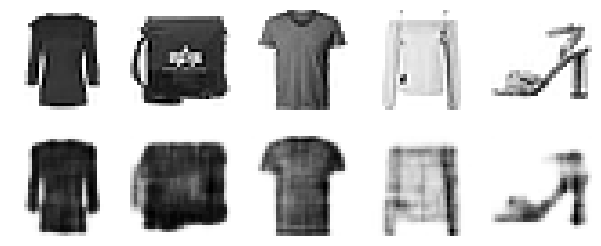

In [ ]:
show_reconstructions(conv_ae)
plt.show()

# 순환 오토인코더

In [ ]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences = True, input_shape = [28, 28]),
    keras.layers.LSTM(30)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape = [30]),
    keras.layers.LSTM(100, return_sequences = True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation = 'sigmoid'))
    ])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])

In [ ]:
recurrent_ae.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.SGD(learning_rate = 0.1), metrics = [round_accuracy])
history = recurrent_ae.fit(X_train, X_train, epochs = 5, validation_data = (X_valid, X_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 119s 66ms/step - loss: 0.5538 - round_accuracy: 0.7068 - val_loss: 0.4411 - val_round_accuracy: 0.8064
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 167s 97ms/step - loss: 0.4166 - round_accuracy: 0.8315 - val_loss: 0.3778 - val_round_accuracy: 0.8574
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 158s 92ms/step - loss: 0.3698 - round_accuracy: 0.8676 - val_loss: 0.3611 - val_round_accuracy: 0.8773
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 119s 69ms/step - loss: 0.3548 - round_accuracy: 0.8787 - val_loss: 0.3505 - val_round_accuracy: 0.8844
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 120s 70ms/step - loss: 0.3453 - round_accuracy: 0.8853 - val_loss: 0.3395 - val_round_accuracy: 0.8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


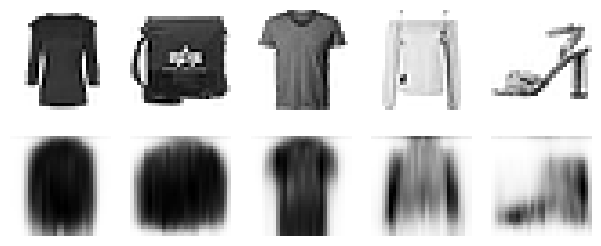

In [ ]:
show_reconstructions(recurrent_ae)
plt.show()

# 잡음 제거 오토인코더

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.GaussianNoise(0.5),
    keras.layers.Dense(100, activation = "selu"),
    keras.layers.Dense(30, activation = "selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation = "selu", input_shape = [30]),
    keras.layers.Dense(28 * 28, activation = "sigmoid"),
    keras.layers.Reshape([28,28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])

denoising_ae.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.SGD(learning_rate = 0.1), metrics = [round_accuracy])
history = denoising_ae.fit(X_train,X_train, epochs = 3, validation_data = (X_valid, X_valid))

Epoch 1/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.5484 - round_accuracy: 0.7023 - val_loss: 0.3806 - val_round_accuracy: 0.8511
Epoch 2/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3772 - round_accuracy: 0.8528 - val_loss: 0.3614 - val_round_accuracy: 0.8713
Epoch 3/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3596 - round_accuracy: 0.8702 - val_loss: 0.3459 - val_round_accuracy: 0.8840


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


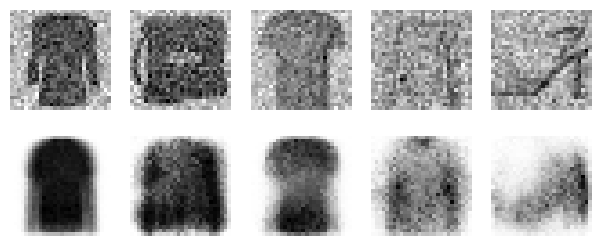

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

# 희소 오토인코더

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(100, activation = "selu"),
    keras.layers.Dense(300, activation = "sigmoid"),
    keras.layers.ActivityRegularization(l1 = 1e-3)
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation = "selu", input_shape = [300]),
    keras.layers.Dense(28 * 28, activation = "sigmoid"),
    keras.layers.Reshape([28,28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])

In [ ]:
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[round_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=5,
                           validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.4898 - round_accuracy: 0.7317 - val_loss: 0.4927 - val_round_accuracy: 0.7289
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.4898 - round_accuracy: 0.7317 - val_loss: 0.4927 - val_round_accuracy: 0.7289
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.4897 - round_accuracy: 0.7317 - val_loss: 0.4927 - val_round_accuracy: 0.7289
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.4897 - round_accuracy: 0.7317 - val_loss: 0.4927 - val_round_accuracy: 0.7289
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.4897 - round_accuracy: 0.7317 - val_loss: 0.4927 - val_round_accuracy: 0.7289


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


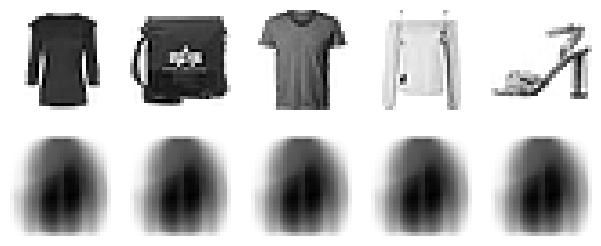

In [ ]:
show_reconstructions(sparse_l1_ae)

In [ ]:
def plot_percent_hist(ax, data, bins):
    counts, _ = np.histogram(data, bins=bins)
    widths = bins[1:] - bins[:-1]
    x = bins[:-1] + widths / 2
    ax.bar(x, counts / len(data), width=widths*0.8)
    ax.xaxis.set_ticks(bins)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, position: "{}%".format(int(np.round(100 * y)))))
    ax.grid(True)

In [ ]:
def plot_activations_histogram(encoder, height=1, n_bins=10):
    X_valid_codings = encoder(X_valid).numpy()
    activation_means = X_valid_codings.mean(axis=0)
    mean = activation_means.mean()
    bins = np.linspace(0, 1, n_bins + 1)

    fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
    plot_percent_hist(ax1, X_valid_codings.ravel(), bins)
    ax1.plot([mean, mean], [0, height], "k--", label="Overall Mean = {:.2f}".format(mean))
    ax1.legend(loc="upper center", fontsize=14)
    ax1.set_xlabel("Activation")
    ax1.set_ylabel("% Activations")
    ax1.axis([0, 1, 0, height])
    plot_percent_hist(ax2, activation_means, bins)
    ax2.plot([mean, mean], [0, height], "k--")
    ax2.set_xlabel("Neuron Mean Activation")
    ax2.set_ylabel("% Neurons")
    ax2.axis([0, 1, 0, height])

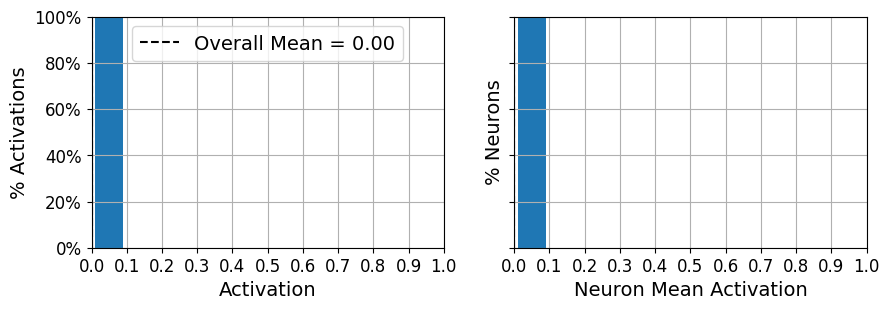

In [ ]:
plot_activations_histogram(sparse_l1_encoder, height=1.)
plt.show()

In [ ]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

kld_reg = KLDivergenceRegularizer(weight=0.05, target = 0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(100, activation = "selu"),
    keras.layers.Dense(300, activation = "sigmoid", activity_regularizer = kld_reg)
    ])
sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation = "selu", input_shape = [300]),
    keras.layers.Dense(28*28, activation = "sigmoid"),
    keras.layers.Reshape([28,28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
              metrics=[round_accuracy])
history = sparse_kl_ae.fit(X_train, X_train, epochs=5,
                           validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.5660 - round_accuracy: 0.7558 - val_loss: 0.4948 - val_round_accuracy: 0.7932
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.4183 - round_accuracy: 0.8322 - val_loss: 0.4502 - val_round_accuracy: 0.8120
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.3974 - round_accuracy: 0.8512 - val_loss: 0.4247 - val_round_accuracy: 0.8273
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.3775 - round_accuracy: 0.8712 - val_loss: 0.4120 - val_round_accuracy: 0.8306
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.3653 - round_accuracy: 0.8794 - val_loss: 0.4050 - val_round_accuracy: 0.8337


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


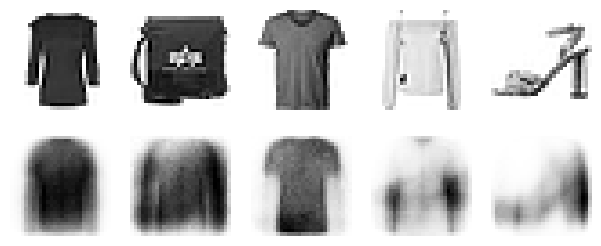

In [ ]:
show_reconstructions(sparse_kl_ae)

그림 저장 sparse_autoencoder_plot


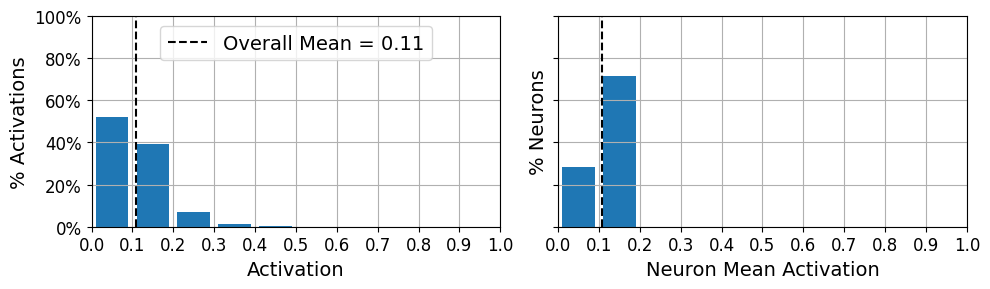

In [ ]:
plot_activations_histogram(sparse_kl_encoder)
save_fig("sparse_autoencoder_plot")
plt.show()

# 변이형 오토인코더

In [ ]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
coding_size = 10

inputs = keras.layers.Input(shape = [28,28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation = "selu")(z)
z = keras.layers.Dense(100, activation = "selu")(z)
codings_mean = keras.layers.Dense(coding_size)(z)
codings_log_var = keras.layers.Dense(coding_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(inputs = [inputs], outputs = [codings_mean, codings_log_var, codings])

In [ ]:
decoder_inputs = keras.layers.Input(shape=[coding_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

In [ ]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

In [ ]:
latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[round_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
